In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 10.5 **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [46]:
fw = lambda x: 1/(1+np.exp(x))
N = 1000
x = np.linspace(0,1,N)**2
print(np.sum(fw(x))*2 / N)

0.8388629028718203


# 10.4 Monte Carlo integration in high dimension
* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$
* Generalize the result for a 10D sphere

In [12]:
def f(x):
    return np.sum(x**2, axis=0)

N = 10000
dim = 10
a, b, step = -1, 1, .5

x = np.random.uniform(a, b, (dim,N))
sphere_points = x[:,f(x)<=1]

if dim == 2:
    fig = plt.figure(figsize=(4,4))
    plt.plot(*sphere_points, ".", markersize=2, alpha=.5)
    plt.xticks(np.arange(a,b+step,step))
    plt.yticks(np.arange(a,b+step,step))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

k, n = sphere_points.shape[1], x.shape[1]
volume = (b-a)**dim * k / n
print(f"Volume: {volume}")

Volume: 2.6624


# 10.2 **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [70]:
from scipy import constants

a0 = constants.physical_constants["Bohr radius"][0]
epsilon_0 = constants.epsilon_0
e = constants.e
E = 7.7e6 * e
Z = 79
sigma = a0 / 100

# a particle bounces back if theta > pi/2 => tan(theta/2) > 1 => Z e^2 / (2 pi epsilon_0 E b) > 1
N = int(1e6)
b_crit = Z * e**2 / (2 * np.pi * epsilon_0 * E * 1)

x = np.random.normal(0, sigma, N)
y = np.random.normal(0, sigma, N)
b = np.sqrt(x**2 + y**2)

tan_theta_half = Z * e**2 / (2 * np.pi * epsilon_0 * E * b)
bouncing_back = np.sum( tan_theta_half > 1 )

print(f"Particles that bounce back: {100 * bouncing_back / b.size} %")

Particles that bounce back: 0.1568 %


# 9.5 **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

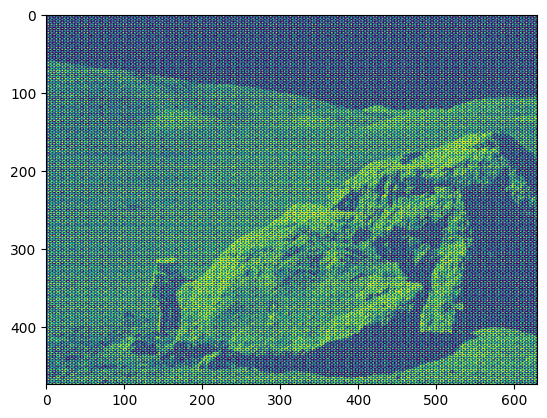

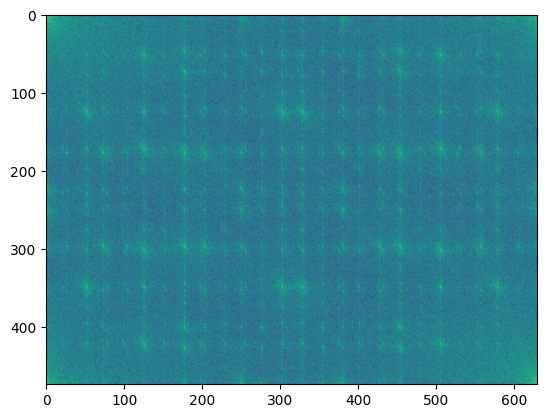

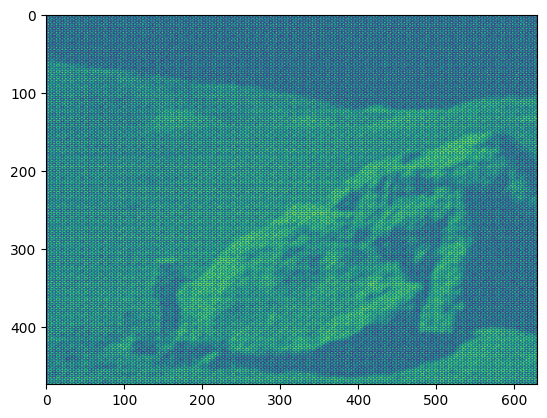

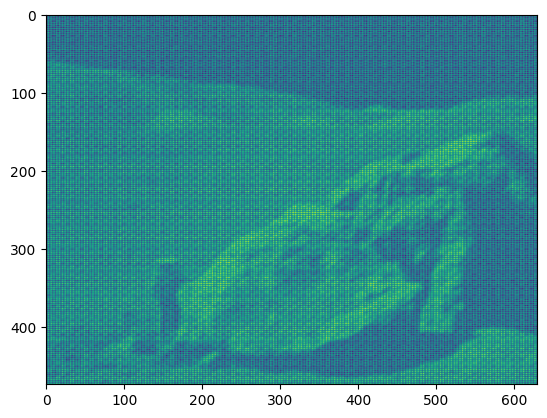

In [118]:
import pylab
from scipy.fftpack import fft2, ifft2
img = pylab.imread("moonlanding.png")
plt.imshow(img)
plt.show()
image_fft = fft2(img)
# plt.imshow(image_fft)
power = np.abs(image_fft)
plt.imshow(np.log(power))
plt.show()

# option 1
min_power = np.percentile(power, 95)
image_fft[power<min_power] = 0
filtered_image = ifft2(image_fft).real
plt.imshow(filtered_image)
plt.show()

# option 2
mask = np.ones_like(image_fft)
r, c = mask.shape 
mask[int(0.1*r):int(0.9*r),int(0.1*c):int(0.9*c)] = 0
image_fft_copy = image_fft.copy() * mask
plt.imshow(ifft2(image_fft_copy).real)
plt.show()

# 9.3 **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


[0. 0.]


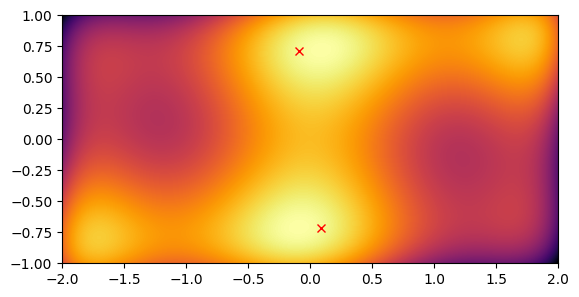

In [161]:
import pylab
from scipy.optimize import minimize

def f(x):
    return (4-2.1*x[0]**2+x[0]**4/3)*x[0]**2 + x[0]*x[1] + (4*x[1]**2-4)*x[1]**2

x = np.linspace(-2, 2, 1000)
y = np.linspace(-1, 1, 1000)
X, Y = np.meshgrid(x, y)
z = f([X, Y])

pylab.imshow(z, extent=(-2, 2, -1, 1), cmap="inferno_r")

xmin1 = minimize(f, [0,-1]).x
xmin2 = minimize(f, [0,1]).x
plt.plot([xmin1[0]], [xmin1[1]], "xr")
plt.plot([xmin2[0]], [xmin2[1]], "xr")

plt.show()

# 9.2 **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

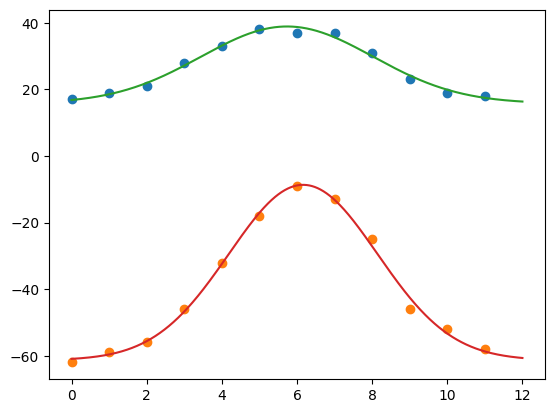

In [100]:
from scipy.optimize import curve_fit

tmax = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
tmin = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

# 1
x0 = np.arange(len(tmax))
for temp in [tmax, tmin]:
    plt.plot(x0, temp, "o")

# 2
def gaussian(x, mean, std, shift, amplitude):
    return shift + amplitude * np.exp(- (x - mean)**2/ (2 * std**2)) / np.sqrt(2 * np.pi * std**2)

# 3-4
x = np.linspace(0, len(tmax), 1000)
for temp in [tmax, tmin]:
    params, _ = curve_fit(gaussian, x0, temp, p0=[6,1,1,1])
    plt.plot(x, gaussian(x, *params))
plt.show()

1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



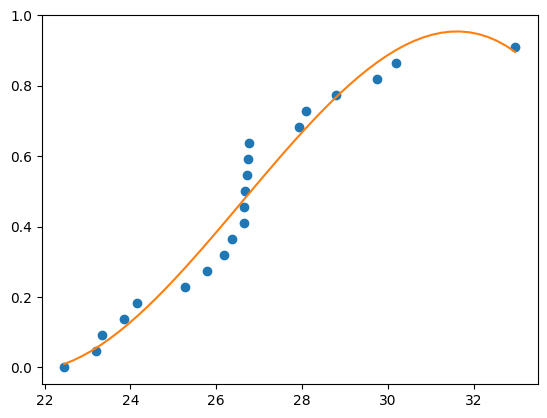

In [140]:
from scipy.interpolate import UnivariateSpline

max_speeds = np.sort(np.load("max-speeds.npy"))
years_nb = max_speeds.shape[0]
max_speeds
cprob = np.array([i/(years_nb+1) for i in range(years_nb)])

quantile_func = UnivariateSpline(max_speeds, cprob)
fifty_wind = quantile_func(1-0.02)

x = np.linspace(min(max_speeds), max(max_speeds))
plt.plot(max_speeds, cprob, "o")
plt.plot(x, quantile_func(x))
plt.show()

# 8.1 **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


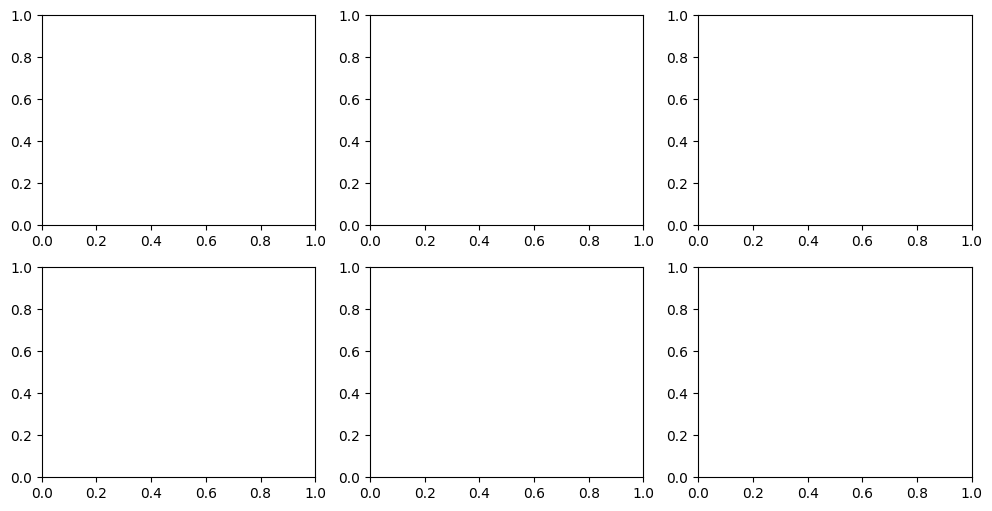

In [264]:
import scipy.linalg as la

np.random.seed(9725)
N = 1000

# 1
x1 = np.random.normal(0, 1, N)
x2 = x1 + np.random.normal(0, 3, N)
x3 = 2*x1 + x2
x = np.stack([x1, x2, x3])

# 2
x_cov = np.cov(x)
l, V = la.eig(x_cov)

# 3
U, spectrum, Vt = la.svd(x)
l_svd = spectrum**2/(N-1)
V_svd = U

D = np.zeros_like(x)
for i in range(min(x.shape)):
    D[i,i] = spectrum[i]

SVD = np.dot(U, np.dot(D, Vt))

# 4
sorted_l = np.sort(l_svd)[::-1]
tot = np.sum(sorted_l)
cum_variance = np.cumsum(100*(sorted_l / tot).real)

# 5
k = np.argmax(cum_variance == 100)
x_reduced = np.dot(V_svd[:,:k+1].T, x)
x_reduced.shape

# 6
redefined_x = np.dot(V_svd.T, x)

fig, axes = plt.subplots(2,3, figsize=(12,6))
# for i in range()
plt.show()

# 7.3 **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

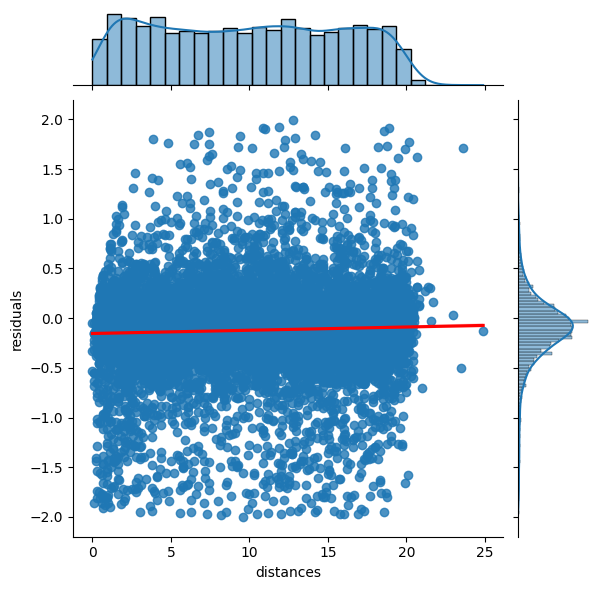

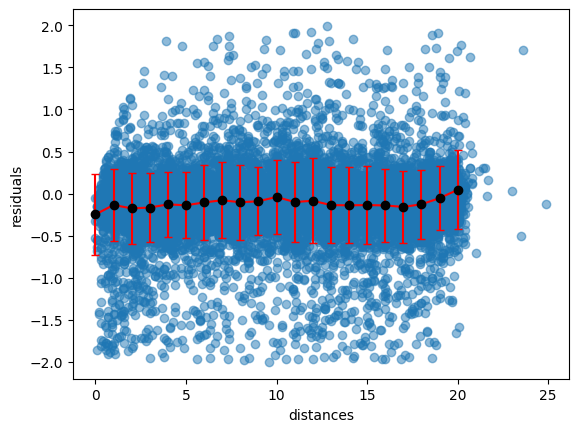

In [44]:
from scipy import stats
import seaborn as sns

data = np.load("data/residuals_261.npy", allow_pickle=1)
df = pd.DataFrame(data.item())
df_cleaned = df[np.abs(df["residuals"])<2]

distances, residuals = df_cleaned["distances"], df_cleaned["residuals"]
output = stats.linregress(distances, residuals)
output.slope, output.intercept

sns.jointplot(df_cleaned, x="distances", y="residuals", kind="reg", line_kws={"color": "red"})
plt.show()

x = np.linspace(0, 20, 21)
y = []
erry = []
for xi in x:
    res_xi = df_cleaned[(df_cleaned["distances"] >= xi) & (df_cleaned["distances"] < xi+1)]["residuals"]
    y.append( np.mean(res_xi) )
    erry.append( np.std(res_xi) )

plt.scatter(distances, residuals, alpha=.5, marker="o")
plt.errorbar(x, y, yerr=erry, color="r", capsize=3)
plt.scatter(x, y, color="k", zorder=3)
plt.xlabel("distances")
plt.ylabel("residuals")
plt.show()

# 7.2 **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

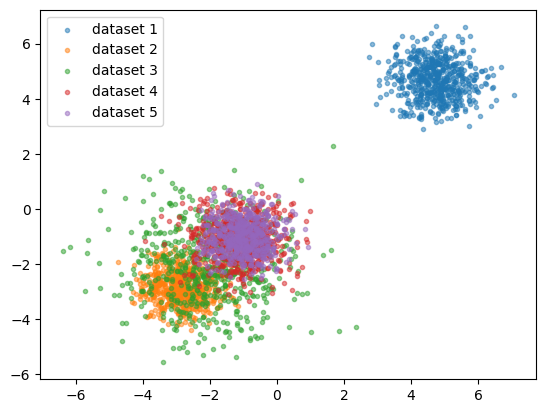

In [50]:
def datasets2D(n_categories=2, n_points=100):
    means = np.random.uniform(-5, 5, n_categories)
    std = np.random.uniform(.5, 1.5, n_categories)
    return [np.random.normal(means[i], std[i], (2,n_points)) for i in range(n_categories)]

list_datasets = datasets2D(5, 600)

for i,data in enumerate(list_datasets):
    plt.scatter(*data, marker=".", label=f"dataset {i+1}", alpha=.5)
plt.legend()
plt.show()

# 7.1 **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


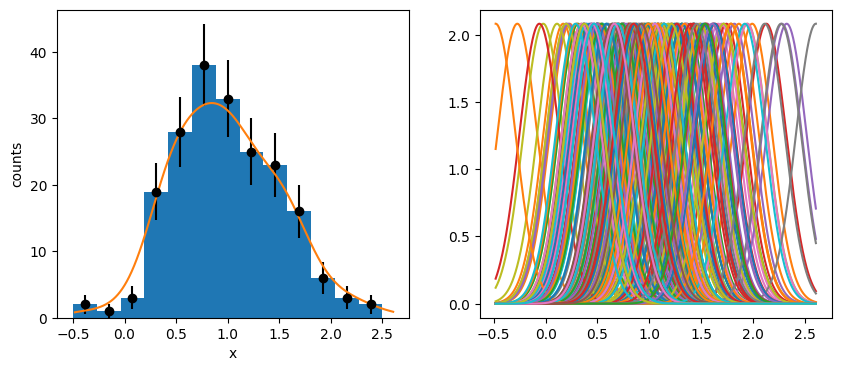

In [45]:
from scipy.stats import norm
from scipy.integrate import trapezoid

# 1
N = 200
x = np.random.normal(1, .5, N)

# 2
fig, axes = plt.subplots(1,2, figsize=(10,4))
bins = np.linspace(-0.5,2.5,int(np.sqrt(N)))
counts, edges, _ = axes[0].hist(x, bins=bins)
bins_centers = (edges[1:]+edges[:-1])/2

axes[0].errorbar(bins_centers, counts, yerr=np.sqrt(counts), fmt="o", color="k")
axes[0].set_xlabel("x")
axes[0].set_ylabel("counts")

# 3
xrange = np.linspace(min(x),max(x),1000)
std = 1.06 * x.std() * x.size**(-1/5)
list_gaussians = []
for xi in x:
    gaussian = norm(loc=xi,scale=std).pdf(xrange)
    axes[1].plot(xrange, gaussian)
    list_gaussians.append(gaussian)

sum_gaussians = np.sum(list_gaussians, axis=0)
axes[0].plot(xrange,  sum_gaussians * trapezoid(counts, bins_centers) / trapezoid(sum_gaussians, xrange))
plt.show()

# 6 Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

    HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
40     1     0           54  3869200167        3184        28
41     1     0           56  3869200167        3177        20
42     1     0           57  3869200167        3187        17
43     1     1            1  3869200168           7        18
44     1     0           64  3869200168           7        16
45     1     1            1  3869200168          13        18
46     1     0           63  3869200168           8        28
47     1     1            2  3869200168          17        26
48     1     0          139  3869200168          23         0
49     1     0           61  3869200168          18        17


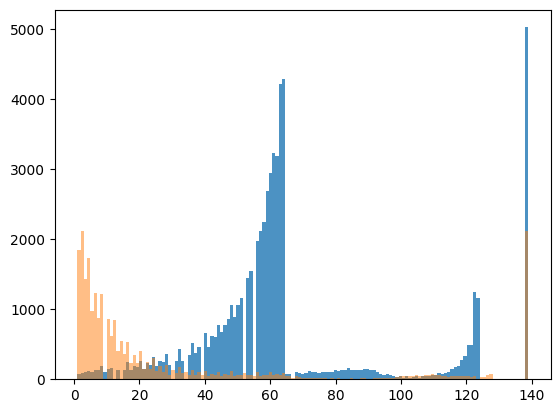

9257     139
83178    139
4962     139
61339    139
40713    139
        ... 
17173      1
54442      1
63658      1
39952      1
24388      1
Name: TDC_CHANNEL, Length: 86257, dtype: int64

In [143]:
df = pd.read_csv("data/data_000637.txt")

# 1
N = df.shape[0]
max_i = np.random.randint(10000, N)
df = df[:max_i]

# 2
max_bx_count = df["BX_COUNTER"].max()

# 3-4
df["ABS_TIME"] = 25/30*df["TDC_MEAS"] + 25*df["BX_COUNTER"] + 25*max_bx_count*df["ORBIT_CNT"]
elapsed_time = 1e-9 * (df["ABS_TIME"].max()-df["ABS_TIME"].min())

# 5
df["HEAD"] = np.random.choice([0,1], size=df.shape[0])

# 6
new_df = df[df["HEAD"]==1]

# 7
bins = max(df["TDC_CHANNEL"])
plt.hist(df[df["FPGA"]==0]["TDC_CHANNEL"], bins=bins, alpha=.8)
plt.hist(df[df["FPGA"]==1]["TDC_CHANNEL"], bins=bins, alpha=.5)
plt.show()

# 8
noise_0 = df[df["FPGA"]==0].groupby(["TDC_CHANNEL"]).size().sort_values(ascending=False).iloc[:3]
noise_1 = df[df["FPGA"]==1].groupby(["TDC_CHANNEL"]).size().sort_values(ascending=False).iloc[:3]

# 9
?

# 5.4 load the binary file named *credit_card.dat* and convert the data into the real credit-card number.
Each line correspond to a credit card number.
Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [296]:
with open("./data/credit_card.dat", "r") as f:
    lines = [line.strip() for line in f.readlines()]

print([("".join([chr(int(line[i:i+6], 2)) for i in range(0, len(line), 6)])).strip().replace(" ", "") for line in lines][:-1])

['7648567337752271', '3257824733542266', '2722000140116652', '0661306337423150', '0432160814624742', '5827202787857303', '5774852820871117', '8140121063522845', '5764113373017100', '6456173741266726', '1228863173820000', '7051016053743166', '0618358716306376', '1545545474445636', '6735311632026834', '7287501115478413', '7033260733284200', '2568524418745024', '1684225375707118', '0672257605756631', '6332835387871340', '1813336111754211', '2477645088402368', '5512350525631326', '3083788206210025', '4521514880450334', '7563365487135787', '8324266404765561', '0565250471683510', '5107550717670738', '2462182124481443', '2788063868616554', '5851587354740547', '0670100440132655', '5874550630480806', '2805540184621260', '5083840663101862', '1076144530132266', '8440480448445277', '4758614106861387', '7586067503152568', '2544125874325165', '3474502344345626', '1410027004345086', '7315444611044215', '0224774283000266', '0170270031450640', '2006243780541600', '8142405517760026', '3026738012411084']

# 4.8 Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

In [81]:
walkers = np.random.randint(-1, 2, (1000,200))
walkers

array([[-1,  0,  0, ..., -1,  1, -1],
       [ 0,  0, -1, ..., -1,  0, -1],
       [ 1, -1,  1, ...,  0, -1,  0],
       ...,
       [ 1,  1, -1, ...,  1, -1,  1],
       [ 1,  0, -1, ...,  0,  1,  1],
       [-1,  1,  0, ...,  0,  1,  0]])

# 4.7 Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [183]:
def primes(N):
    mask = np.ones(N+1)
    mask[:2] = 0
    for i in range(N+1):
        if mask[i]:
            mask[2*i::i] = 0
    
    return np.nonzero( (np.arange(N+1)*mask).astype(int) )[0]

%timeit primes(100)
%timeit primes(1000)

25.6 µs ± 1.85 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
171 µs ± 4.3 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


# 4.6 Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [76]:
u = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
print(1.6 * (u[:,np.newaxis] + u))

[[   0.   316.8  484.8 1177.6 1393.6 1880.  2360.  2470.4 3060.8 3916.8]
 [ 316.8  633.6  801.6 1494.4 1710.4 2196.8 2676.8 2787.2 3377.6 4233.6]
 [ 484.8  801.6  969.6 1662.4 1878.4 2364.8 2844.8 2955.2 3545.6 4401.6]
 [1177.6 1494.4 1662.4 2355.2 2571.2 3057.6 3537.6 3648.  4238.4 5094.4]
 [1393.6 1710.4 1878.4 2571.2 2787.2 3273.6 3753.6 3864.  4454.4 5310.4]
 [1880.  2196.8 2364.8 3057.6 3273.6 3760.  4240.  4350.4 4940.8 5796.8]
 [2360.  2676.8 2844.8 3537.6 3753.6 4240.  4720.  4830.4 5420.8 6276.8]
 [2470.4 2787.2 2955.2 3648.  3864.  4350.4 4830.4 4940.8 5531.2 6387.2]
 [3060.8 3377.6 3545.6 4238.4 4454.4 4940.8 5420.8 5531.2 6121.6 6977.6]
 [3916.8 4233.6 4401.6 5094.4 5310.4 5796.8 6276.8 6387.2 6977.6 7833.6]]


# 4.4 Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

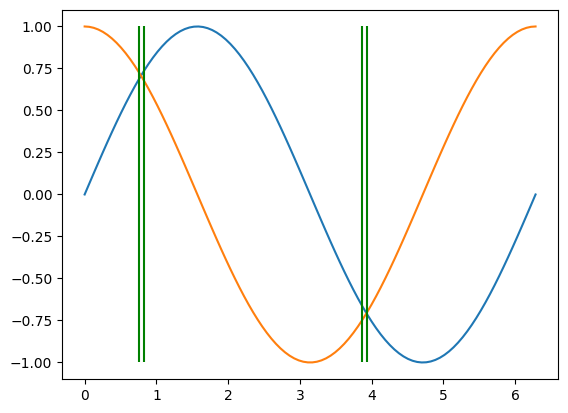

In [47]:
x = np.linspace(0, 2*np.pi, 100)
sin_x = np.sin(x)
cos_x = np.cos(x)
el_10ths = x[::10]
reversed = x[::-1]
f = np.abs(sin_x-cos_x)
special_points = x[f < 0.1]

plt.plot(x, sin_x)
plt.plot(x, cos_x)
plt.vlines(special_points, -1, 1, colors=["green"])
plt.show()

# 4.2 Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [162]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

print(np.outer(u, v))
print(np.array( [[n*m for m in v] for n in u] ))
print(np.tile(u, (len(v),1)).T * v)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


In [145]:
%%bash
for i in {1..5}; do
    echo $i
done

1
2
3
4
5
